## Import and process data

Let's import all the necessary libraries.

In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Let's load the data and transform it into a DataFrame, by giving each column the appropriate name.

In [21]:
data = pd.read_csv('wdbc.data')
data

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
column_names = ['ID', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
data = pd.read_csv('wdbc.data', names=column_names, usecols=range(0,32), delimiter=",")
data


,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Data preprocessing
Now that we have the DataFrame, we can start preprocessing the data to improve its quality.

In [23]:
data.shape

(569, 32)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The dataset contains only one categorical feature, that is, diagnosis,while all the other features are of type float64.
We're going to drop the ID column as we're not going to use it in our analysis.

In [25]:
data.drop(['ID'], axis=1, inplace=True)

'diagnosis' is our target variable, so let's remove it from the original dataframe and save it.

In [26]:
data_features = data.drop(['diagnosis'], axis = 1)
df_target = data['diagnosis']

## Scaling the data

We're going to use scikit-learn's StandardScaler to scale the data.

In [27]:
scaler = StandardScaler()
scaler.fit(data_features)

StandardScaler()

Now that the data is scaled, we can concatenate the scaled dataframe with the column containing the target feature to have a complete dataframe. 

In [28]:
features_scaled = scaler.transform(data_features)
features_scaled = pd.DataFrame(data=features_scaled, columns=data_features.columns)
df_scaled = pd.concat([features_scaled, data['diagnosis']], axis=1)

In [29]:
X_scaled = features_scaled

## Exploring Correlation between Features

PCA simplifies complex datasets. Let's see if by plotting the correlation heatmap we can uncover any pairs of features with a high correlation.

<Axes: >

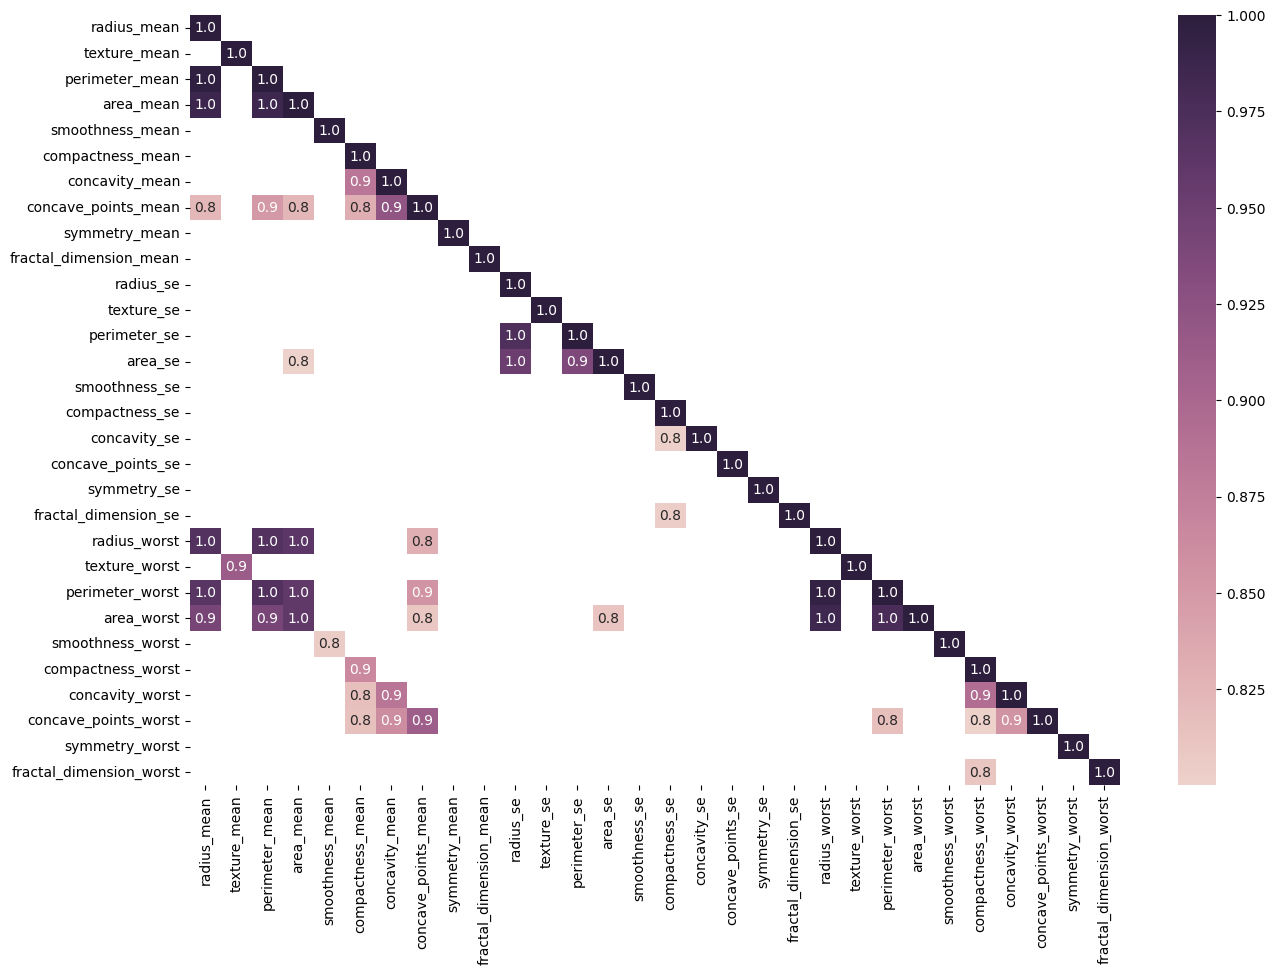

In [30]:
corr_mat = X_scaled.corr()
mask = np.zeros_like(corr_mat, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True

plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat[corr_mat > 0.8], annot=True,
            fmt='.1f', cmap=sns.cubehelix_palette(200), mask=mask)

Here we can see all the variables that have a correlation higher than 0.8. Let's explore a few, such as mean perimeter and mean area, and mean concavity and mean concave points. 

<Figure size 600x600 with 0 Axes>

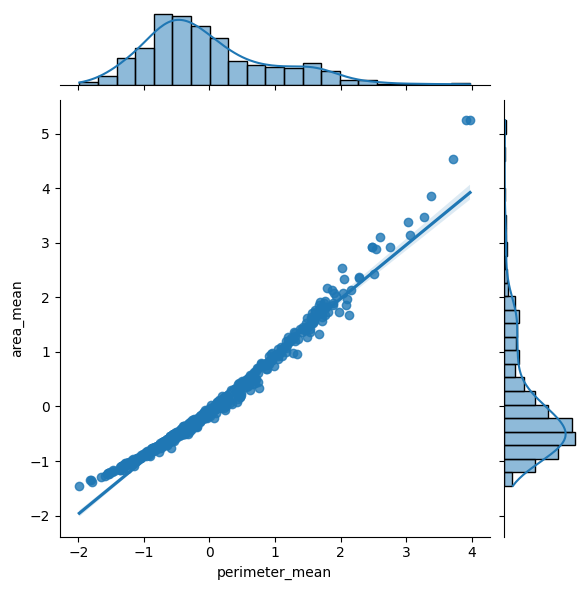

In [31]:
plt.figure(figsize=(6, 6))
sns.jointplot(x=X_scaled['perimeter_mean'], y=X_scaled['area_mean'], kind='reg')

<Figure size 600x600 with 0 Axes>

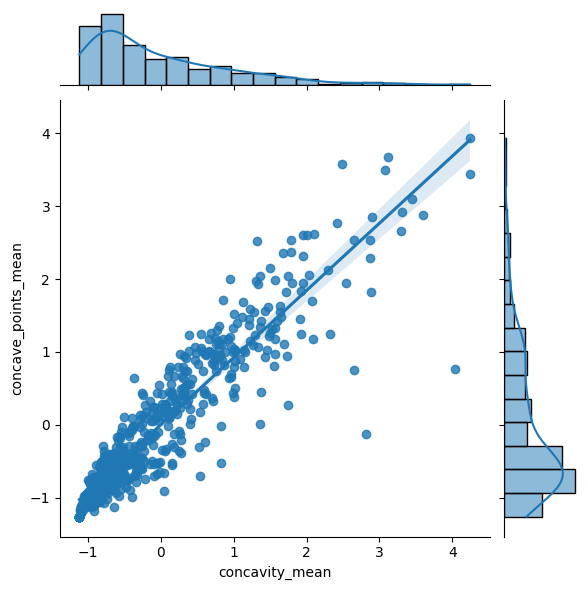

In [32]:
plt.figure(figsize=(6, 6))
sns.jointplot(x=X_scaled['concavity_mean'], y=X_scaled['concave_points_mean'], kind='reg')

These two couples are very highly correlated! This mean we shouldn't include all of these in our model, as it means they're probably contributing most of the same information to the outcome variable.

## Applying Principal Component Analysis

PCA reduces the dimensionality of large datasets, extracting the most informative features from large datasets while preserving the most relevant information from the initial dataset. This reduces model complexity.

To improve PCA's performance, we need to scale data - which we did in the previous step.

In [33]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

Let's visualise the data based on the two principal components.

Text(0.5, 0, 'Second Principal Component')

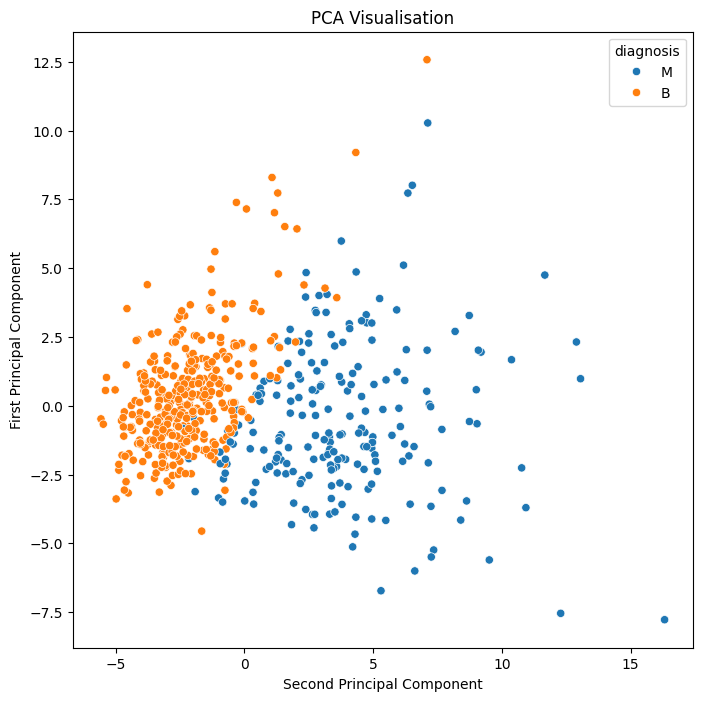

In [34]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['diagnosis'])
plt.title("PCA Visualisation")
plt.ylabel("First Principal Component")
plt.xlabel("Second Principal Component")

Let's plot the PCA components!

In [35]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [36]:
column_name = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [37]:
comp = pd.DataFrame(pca.components_, columns = column_name)

<Axes: >

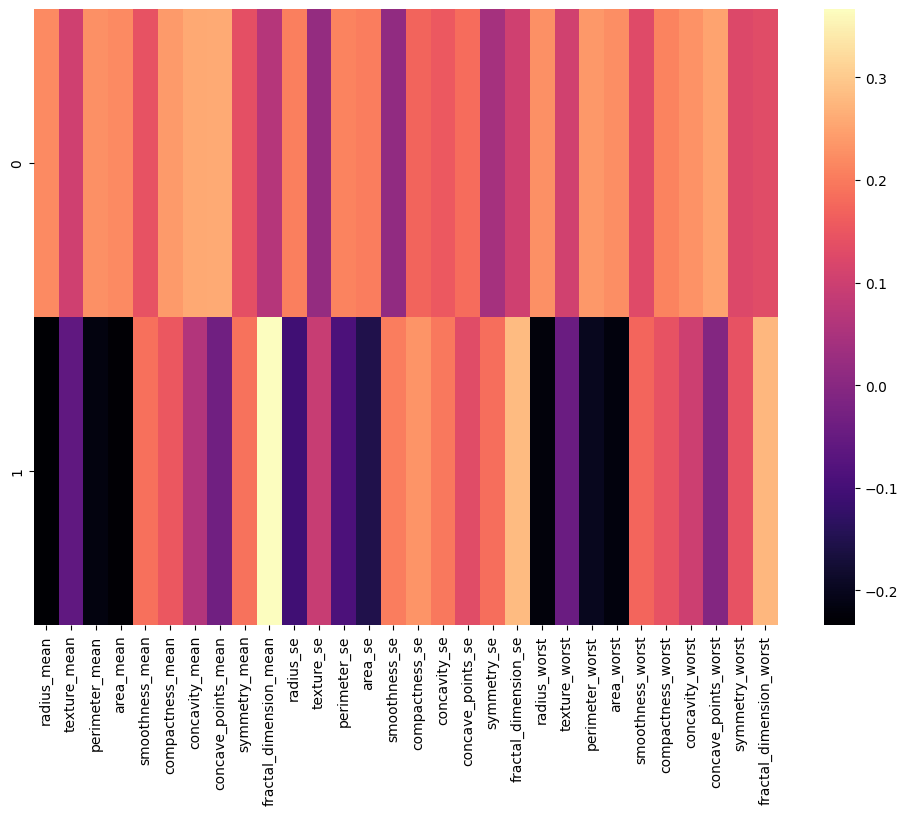

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(comp, cmap='magma')

In the first row (PC1) we can observe strong positive correlation between features like area_mean, perimeter_mean, radius_mean, area_worst, and perimeter_worst. The features represent a common underlying factor - they're the measurements relating to the size of the tumour. Hence, the first principal component (PC1) might represent a general size factor since it is strongly associated with size-related measurements.

In the second row (PC2) we can see that smoothness_se, compactness_se, and concavity_se are more influential for this component. This indicates that PC2 may be capturing variance related to the shape or texture irregularities of the tumour.